In [33]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from scipy import stats
from sklearn.mixture import GaussianMixture
import cartopy.crs as ccrs
import colormaps as clm
import matplotlib as mpl

# データの準備

In [34]:
gpcp_path = "/docker/mnt/d/research/D3/cnn3/transfer/predictand/continuous/gpcp_5x5_coarse_std_MJJASO_monsoon.npy"
gpcp = np.squeeze(np.load(gpcp_path))

In [35]:
gpcp_flat = gpcp.reshape(44, 252)
gpcp_t = gpcp_flat.T
print(gpcp_t.shape)

(252, 44)


# 可視化

In [36]:
def draw_map(label, cluster_num=3):
    plt.rcParams["font.size"] = 18
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-120, -30, -15, 55)
    
    cm = plt.cm.get_cmap('tab20', cluster_num)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(label,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     cmap=cm,
                    )
    cbar = fig.colorbar(mat, ax=ax)
    plt.show()

In [37]:
def plot_km(data, labels, km, cluster_num=3):
    fig, axes = plt.subplots(n, figsize=(8, 18))
    plt.subplots_adjust(hspace=0.5)
    for i in range(cluster_num):
        ax = axes[i]
        for xx in data[labels == i]:
            ax.plot(xx.ravel()[:], "k-", alpha=.03)
        ax.plot(km.cluster_centers_[i].ravel()[:], "r-")
    plt.show()

# calc done

In [41]:
# gpcp
n = 3 # クラスタ数
met = 'softdtw' # or dtw

km_dtw = TimeSeriesKMeans(n_clusters=n,
                          random_state=42,
                         )

gpcp_labels = km_dtw.fit_predict(gpcp_t)
gpcp_all = gpcp_labels[:]
gpcp_map = np.reshape(gpcp_all, (14, 18))

draw_map(gpcp_map, cluster_num=n)
plot_km(gpcp_t, gpcp_labels, km_dtw, cluster_num=n)

NameError: name 'SKLEARN_VERSION_GREATER_THAN_OR_EQUAL_TO_1_3_0' is not defined

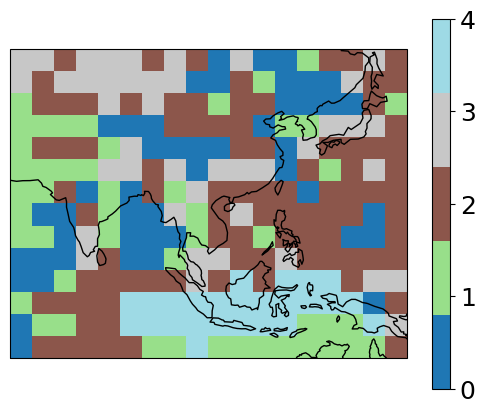

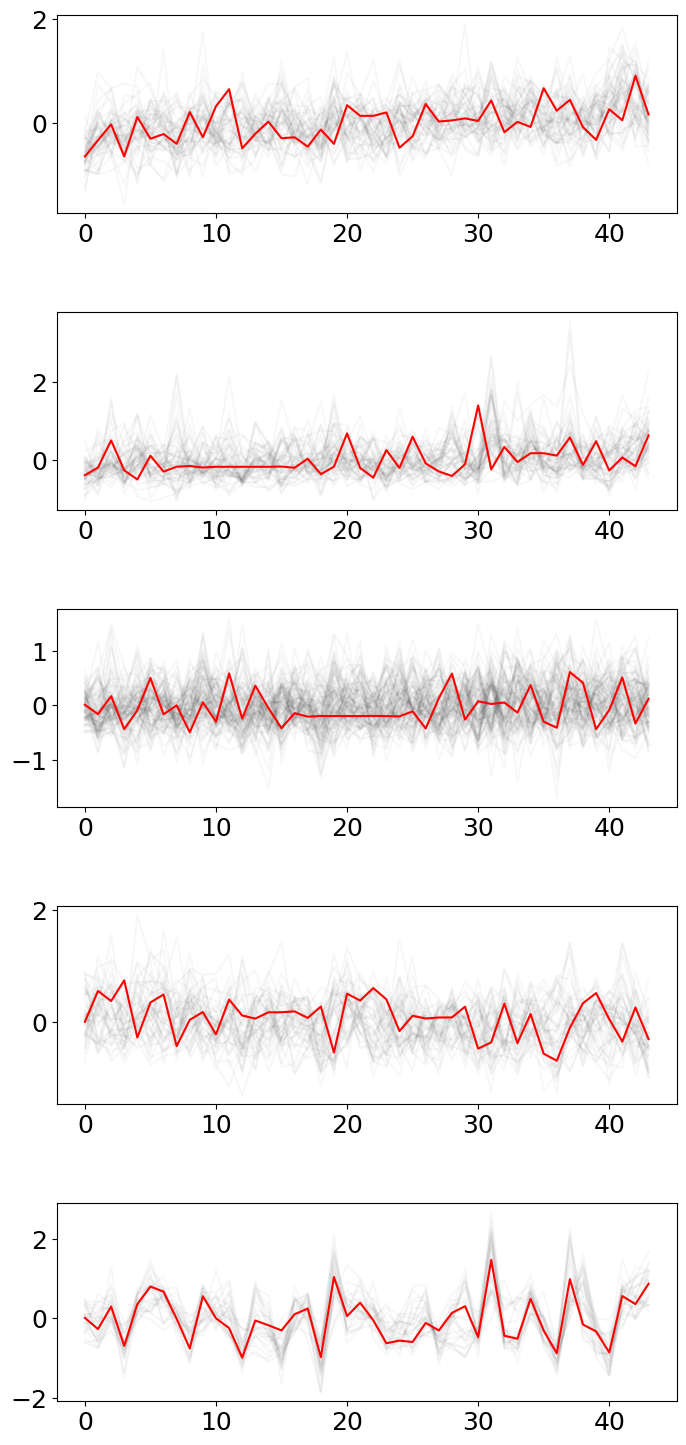

In [18]:
# gpcp
n = 5 # クラスタ数

km_dtw = TimeSeriesKMeans(n_clusters=n,
                          random_state=42,
                          metric="dtw")

gpcp_labels = km_dtw.fit_predict(gpcp_t)
gpcp_all = gpcp_labels[:]
gpcp_map = np.reshape(gpcp_all, (14, 18))

draw_map(gpcp_map, cluster_num=n)
plot_km(gpcp_t, gpcp_labels, km_dtw, cluster_num=n)

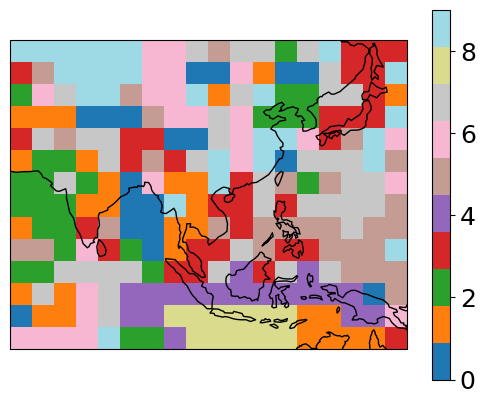

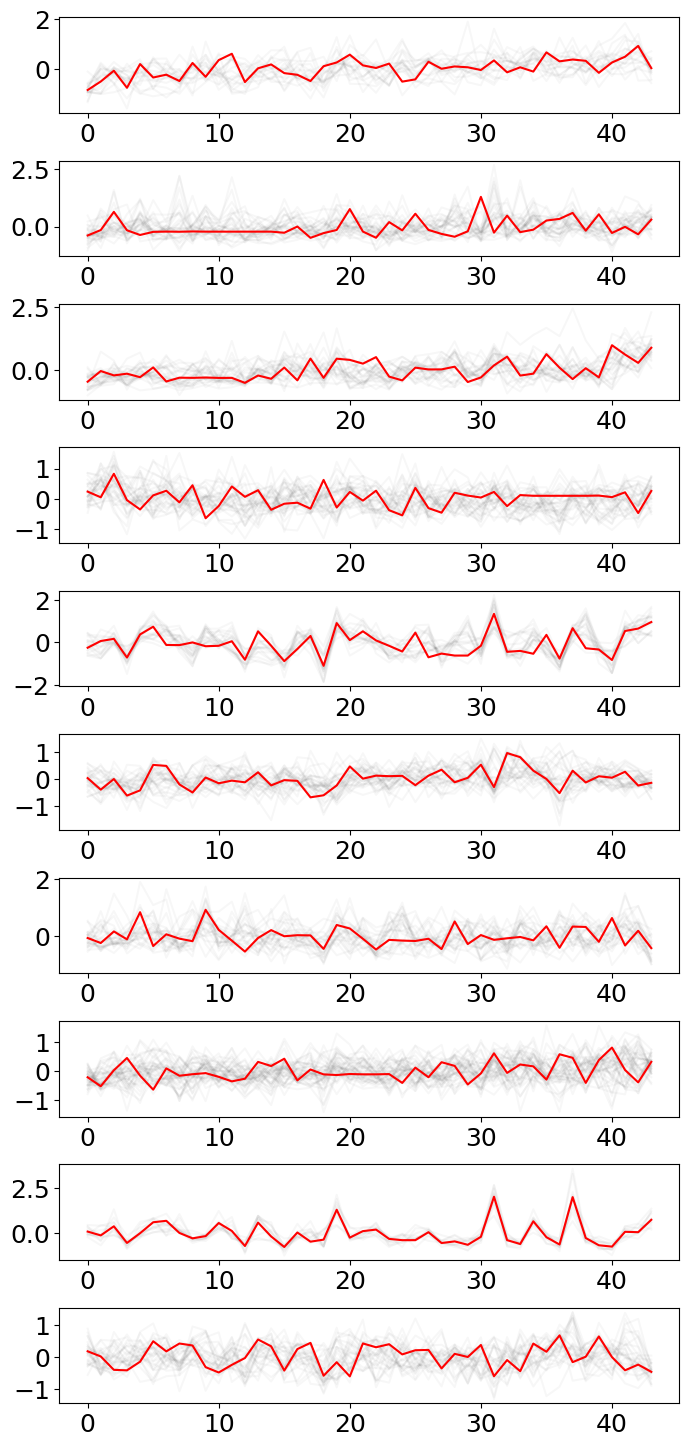

In [30]:
# gpcp
n = 10 # クラスタ数

km_dtw = TimeSeriesKMeans(n_clusters=n,
                          random_state=42,
                          metric="dtw")

gpcp_labels = km_dtw.fit_predict(gpcp_t)
gpcp_all = gpcp_labels[:]
gpcp_map = np.reshape(gpcp_all, (14, 18))

draw_map(gpcp_map, cluster_num=n)
plot_km(gpcp_t, gpcp_labels, km_dtw, cluster_num=n)